In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [3]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [4]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


In [6]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


In [7]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


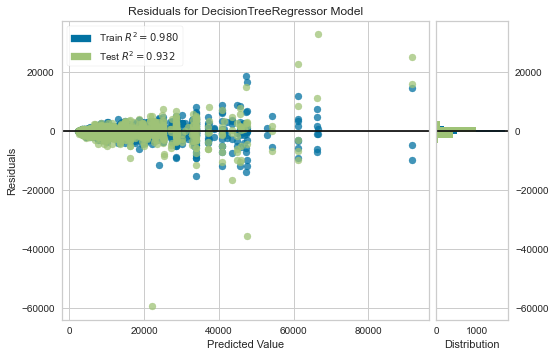

In [8]:
plot_model(tuned_dt)

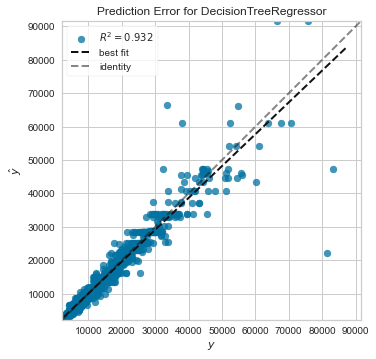

In [9]:
plot_model(tuned_dt, plot = 'error')

In [10]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [13]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11100.000000
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,11258.107143
2,1.01,Good,E,SI1,G,G,GIA,5161,5243.827586
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,38788.600000
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4107.533333


In [14]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9601

In [17]:
dt = create_model('dt', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1012.34,4832268.45,2198.24,0.96,0.11,0.08
1,1012.81,3908061.07,1976.88,0.96,0.10,0.08
2,1057.16,8196186.99,2862.90,0.92,0.12,0.08
3,1049.45,4758230.22,2181.34,0.95,0.11,0.08
4,1001.72,4303088.17,2074.39,0.96,0.11,0.08
Mean,1026.70,5199566.98,2258.75,0.95,0.11,0.08
SD,22.22,1534997.04,312.44,0.02,0.00,0.00


In [19]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


In [21]:
plot_model(tuned_dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,10
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.01
min_impurity_split,None
min_samples_leaf,2
min_samples_split,9
min_weight_fraction_leaf,0.0


In [23]:
bagged_dt = ensemble_model(dt)
print(bagged_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,726.1416,1310471.9634,1144.7585,0.9856,0.0807,0.0625
1,868.4689,5281002.5620,2298.0432,0.9595,0.0828,0.0609
2,763.2174,1771382.7115,1330.9330,0.9838,0.0795,0.0607
3,772.6562,1956278.0801,1398.6701,0.9784,0.0837,0.0610
4,823.5289,4656894.6411,2157.9839,0.9419,0.0924,0.0660
5,886.0953,4615903.6276,2148.4654,0.9606,0.0893,0.0645
6,810.1645,3560414.2717,1886.9060,0.9666,0.0811,0.0600
7,799.2312,2708726.6216,1645.8210,0.9657,0.0846,0.0638
8,781.2523,2869389.6194,1693.9273,0.9718,0.0870,0.0612
9,885.7144,4472842.1582,2114.9095,0.9574,0.1009,0.0684


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=123,
                                                      splitter='best'),
                 bootstrap=Tr

In [24]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,794.1234,1739429.1132,1318.8742,0.9809,0.0913,0.0678
1,949.3010,5385893.5806,2320.7528,0.9587,0.0897,0.0669
2,807.9548,2141704.6719,1463.4564,0.9804,0.0858,0.0648
3,829.5428,2178205.1591,1475.8744,0.9760,0.0891,0.0656
4,938.3813,8411034.0635,2900.1783,0.8951,0.1052,0.0731
5,989.3711,7498383.4897,2738.3176,0.9360,0.0998,0.0699
6,840.6906,3632495.5506,1905.9107,0.9659,0.0898,0.0647
7,791.8095,2317095.4332,1522.2009,0.9707,0.0871,0.0654
8,734.2729,2044156.2941,1429.7399,0.9799,0.0824,0.0591
9,917.7350,4060097.1184,2014.9683,0.9613,0.1060,0.0732


In [25]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,677.8376,1212150.8423,1100.9772,0.9867,0.0787,0.0594
1,813.5636,5152091.9978,2269.8220,0.9605,0.0790,0.0580
2,743.5723,1732420.6187,1316.2145,0.9841,0.0768,0.0589
3,752.6880,1635803.6720,1278.9854,0.9820,0.0774,0.0594
4,754.6219,3626669.7684,1904.3817,0.9548,0.0884,0.0621
5,877.0427,5099729.8931,2258.2582,0.9565,0.0891,0.0634
6,733.2314,2653526.6055,1628.9649,0.9751,0.0752,0.0556
7,736.7730,1850941.1083,1360.4930,0.9766,0.0790,0.0608
8,745.0195,2408003.5731,1551.7743,0.9764,0.0810,0.0588
9,840.6430,4134495.4976,2033.3459,0.9606,0.0972,0.0651


In [26]:
blender = blend_models(estimator_list = [dt, dt, dt])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


In [27]:
stacker = stack_models([dt, dt, dt])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,935.0517,2098699.2536,1448.6888,0.9770,0.1292,0.0935
1,1177.1100,9078706.6606,3013.0892,0.9304,0.1474,0.0964
2,928.4012,2315045.2766,1521.5273,0.9788,0.1266,0.0908
3,1019.4824,3421720.2912,1849.7893,0.9622,0.1257,0.0896
4,1165.3338,7303713.0549,2702.5383,0.9089,0.1519,0.1102
5,1012.1580,4908007.0244,2215.4022,0.9581,0.1390,0.0942
6,1071.0982,3862940.0685,1965.4364,0.9637,0.1381,0.0994
7,966.0780,2477233.5130,1573.9230,0.9687,0.1445,0.0979
8,1064.2335,4467965.2162,2113.7562,0.9561,0.1377,0.0939
9,1168.5879,5936167.7496,2436.4252,0.9435,0.1594,0.1115
